---

Title: "Machine Leaning: Customer Churn Prediction"

Author: "Joseph Armando Carvallo"

Date: "21/03/2021"

---

DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has been consistent in paying attention to its customer experience so that customers will not leave it. Even though it's only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning.

I will do Machine Learning Modeling using last month's data, which is June 2020. The steps to be taken are
1. Performing Exploratory Data Analysis
2. Doing Data Pre-Processing
3. Doing Machine Learning Modeling
4. Determining the Best Model

In this analysis, several packages will be used that help us in conducting data analysis are
1. Pandas (Python for Data Analysis) is a Python library that focuses on data analysis processes such as data manipulation, data preparation, and data cleaning.
2. Matplotlib is a Python library that focuses on data visualization such as plotting graphs. Matplotlib can be used in Python scripts, Python and IPython shells, web application servers, and several other graphical user interface (GUI) toolkits.
3. Seaborn builds plots on top of Matplotlib and introduces additional plot types. It also makes your traditional Matplotlib plots look attractive.
4. Scikit-learn is a library in Python that provides many Machine Learning algorithms both for Supervised, Unsupervised Learning, or used to prepare data.
5. Xgboost is a library in Python for the extreme gradient boosting algorithm (xgboost).
6. Pickle implements a binary protocol for serializing and deserializing Python object structures.

In [ ]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

For the dataset used is already provided in csv format, please read through the pandas function in python https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv

The details for the data are as follows:

* UpdateAt is periode of data taken
* customerID is unique number used to identify customers
* gender is gender of customers either of the two sexes, male and female
* SeniorCitizen is status of customers having retired or in productive ages
* Partner is either customers having a partner or single
* tenure is number of months the customers have woked in the company
* PhoneService is customers having phone service or not
* InternetService is customers having internet service or not
* StreamingTV is customers having streaming TV or not
* PaperLessBilling is, or eBilling, customers receive an electronic version of bill instead of a paper bill
* MonthlyCharges is the amount charged to the customers monthly
* TotalCharges is the total amount charged to the customers
* Churn is whether the customer returns or not

In [ ]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv') #load dataset

print('Dataset Size is', df_load.shape) #show size of dataset
print('Number of CustomerID Unique Values are', df_load.customerID.nunique()) #show unique values of customerID
df_load.head() #show first five rows of dataset

Dataset Size is (6950, 13)
Number of CustomerID Unique Values are 6950


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) allows analysts to understand the content of the data used, ranging from distribution, frequency, correlation and others. In general, EDA is carried out in several ways:
* Univariate Analysis — descriptive analysis with one variable
* Bivariate Analysis — relational analysis involves the analysis of two variables, for the purpose of determining the empirical relationship between them.
* Multivariate Analysis — a set of analysis techniques used for analysis of data sets that contain more than one variable, and the techniques are especially valuable when working with correlated variables.

In this case, I want to see the distribution of the percentage of Churn distribution from all data, and the data distribution of the predictor variable to the label (Churn).

**Visualizing Churn Percentage**

I want to see a univariate visualization of data regarding the percentage of data churn from customers. I use `value_counts()` function to count the unique number of a column, and `pie()` to create a pie chart

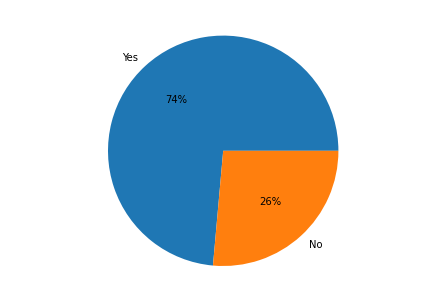

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

**Exploratory Data Analysis of Numerical Variables**

What I will do next is choose a predictor variable that is numeric and plot bivariately, then interpret it. I use the `df_load` data to process at this stage and use the `subplots()` function to create an image and a set of subplots.

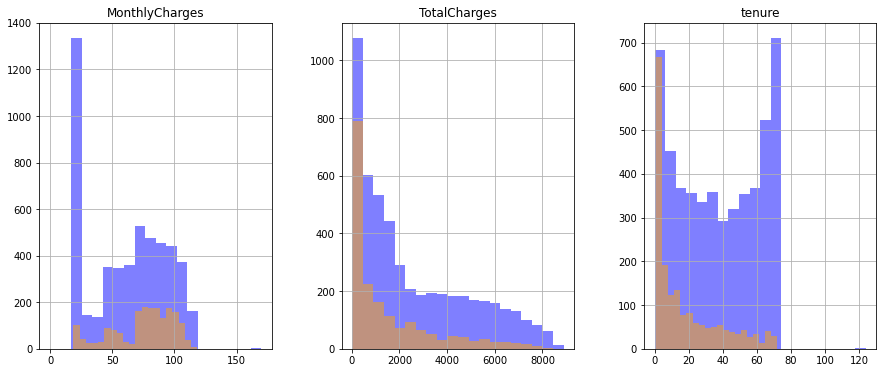

In [ ]:
numerical_features = ['MonthlyCharges','TotalCharges','tenure'] #creating bin in chart

fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Plot two overlays of histogram per each numerical_features
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

**Exploratory Data Analysis of Categorical Variables**

After that, I will choose predictor variables that are categorical and make a bivariate plot, then interpret it. I use `df_load` data for processing at this stage and use the `countplot()` function to plot the number of observations in each bin of the categorical variable

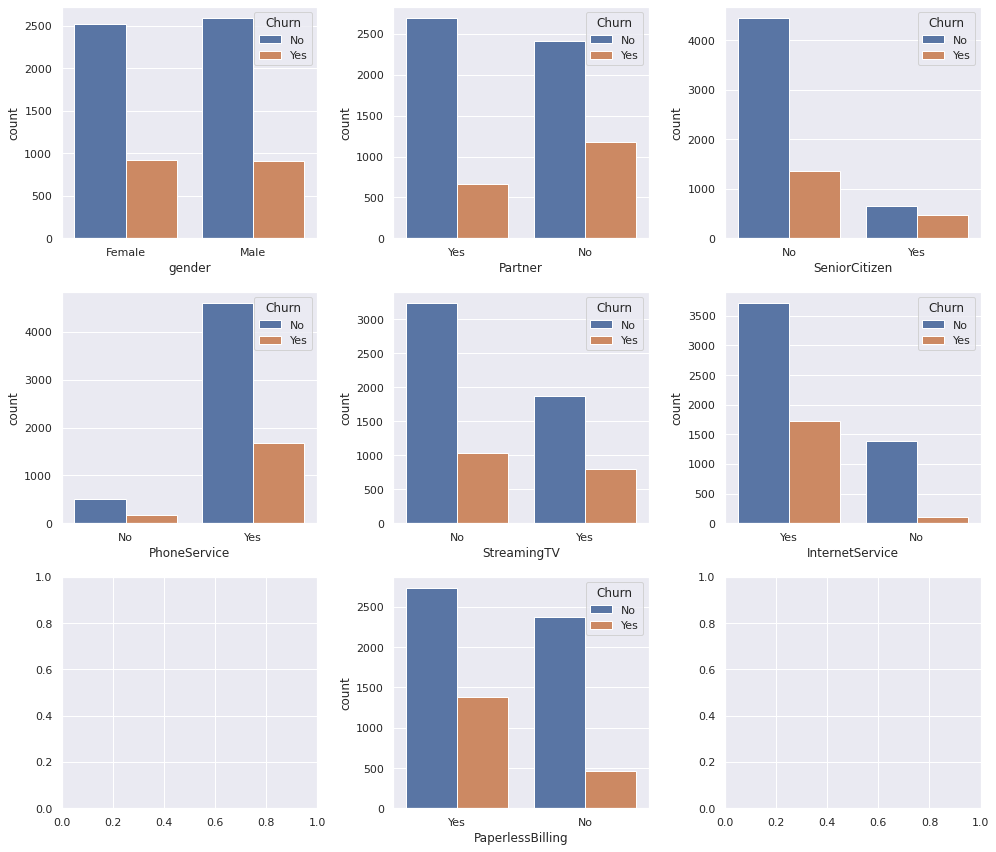

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Based on the results and analysis above, it can be concluded:

1. in the pie chart visualization of Churn, the overall distribution of the customer data does not churn, with details of **Churn 26%** and **Not Churn 74%**.
2. in the visualization of numerical variables, at MonthlyCharges there is a tendency if the smaller the value of the monthly fee charged, the smaller the tendency to Churn. At TotalCharges there is no visible trend towards Churn customers. At tenure, there is a tendency that the longer the customer subscribes, the smaller the tendency to Churn.
3. in the visualization of categorical variables, there is no significant difference for people churn when viewed from the factor of `gender` and `PhoneService`. However, there is a tendency that people who churn are people who do not have partners (`partners: No`), people whose status is senior citizens (`SeniorCitizen: Yes`), people who have TV streaming services (`StreamingTV: Yes`) , people who have Internet service (`internetService: Yes`), and people whose bills are paperless (`PaperlessBilling: Yes`).

# Data Preprocessing

**Removing Unnecessary Columns**

Next I will delete the column that will not be included in the modeling, then I will save it with the name `cleaned_df` and display the top 5 rows. Here I will use `drop()` function to remove the unnecessary columns from clean dataset.

The columns that are not needed are the CustomerID and UpdateAt columns

In [ ]:
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


**Encode Data**

I use the data from the previous results and analysis `cleaned_df`, to change the value of the data that is still in the form of a string to be converted into numeric form using `LabelEncoder()`. I also use `describe()` to see the description of the data.

In [ ]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


**Split Dataset**

I used the data from the previous results and analysis `cleaned_df`, to divide the dataset into 2 parts (70% training and 30% testing) based on the predictor variable (X) and the target (Y). I use `train_test_split()` to split the data. I've also included the `value_counts()` function to check if the divisions are equal. Then I save the result of splitting the data into x_train, y_train, x_test, and y_test

In [ ]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('The number of rows and columns of x_train is', x_train.shape,'whilst the number of rows and columns of y_train is', y_train.shape, '.\n')
print('Churn percentage in training data is\n', y_train.value_counts(normalize=True), '\n')
print('The number of rows and columns of x_test is', x_test.shape,'whilst the number of rows and columns of y_test is', y_test.shape, '.\n')
print('Churn percentage in testing data is', y_test.value_counts(normalize=True))

The number of rows and columns of x_train is (4865, 10) whilst the number of rows and columns of y_train is (4865,) .

Churn percentage in training data is
 0    0.734841
1    0.265159
Name: Churn, dtype: float64 

The number of rows and columns of x_test is (2085, 10) whilst the number of rows and columns of y_test is (2085,) .

Churn percentage in testing data is 0    0.738129
1    0.261871
Name: Churn, dtype: float64


**Inference**

After further analysis, it turns out that there are columns that are not needed in the model, namely CustomerID and UpdateAt (the period of data collection), so they need to be deleted.

Then I continue to convert the value of the data that is still in the form of a string into numeric through encoding.

After that, it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1.

The last step is to divide the data into 2 parts for modeling purposes, after it is seen from the number of rows and columns of each data is appropriate & the percentage of churn column is also the same as the data at the beginning, this indicates that the data is separated properly and correctly.

# Modelling: Logistic Regression

Next step, I will create a model using the Logistic Regression Algorithm. I wll use `LogisticRegression()` to call the algorithm, fit it to train data and save it as `log_model`.

In [ ]:
log_model = LogisticRegression().fit(x_train, y_train)
print('The Logistic Regression model formed is: \n', log_model)

The Logistic Regression model formed is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Training Model Performance: Show Metrics**

After creating the model, I will do the calculations to get the classification report and the confusion matrix in the training data. I will use `classification_report()` and `confusion_matrix()` functions.

In [ ]:
# Predict
y_train_pred = log_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Logistic Regression)')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression)
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



**Training Model Performance: Show Plot**

After getting the results of the classification report in the previous step, I will visualize the report.

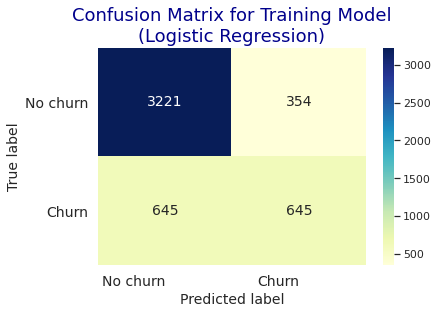

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Testing Model Performance: Show Metrics**

After creating the model, I will do the calculations to get the classification report and the confusion matrix in the data testing. I will use `classification_report()` and `confusion_matrix()` functions.

In [ ]:
# Predict
y_test_pred = log_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.79      2085



**Testing Model Performance: Show Plot**

After displaying the metrics in the previous step, I will visualize the metrics that have been generated previously.

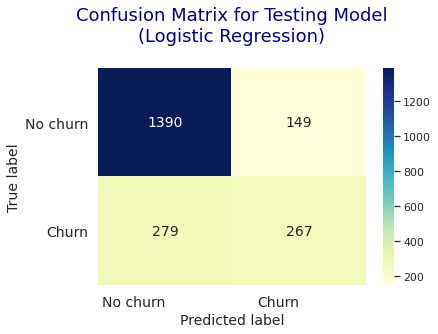

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Inference**

From the results and analysis above, I can conclude:
1. If I use the logistic regression algorithm by calling `LogisticRegression()` from sklearn without adding any parameters, then the result is a model with default settings from sklearn, details can be seen in the documentation.
2. From the training data, the model can predict the data by producing an accuracy of 79,4%, with details *3221 correctly predicted not churn*, *645 correctly predicted churn*, *354 incorrectly predicted churn but actually not churn*, and *645 incorrectly predicted churn but actually not churn*.
3. From the data testing, the model can predict the data by producing an accuracy of 79,5%, *1390 correctly predicted not churn*, *267 correctly predicted churn*, *149 incorrectly predicted not churn but actually churn*, and *279 incorrectly predicted churn but actually not churn*.

# Modelling: Random Forest Classifier

Next step, I will create a model using the Random Forest Classifier Algorithm. I will use `RandomForestClassifier()` to call the algorithm, then fit it to data train and save it as `rdf_model`.

In [ ]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Training Model Performance: Show Metrics**

After creating the model, I will do the calculations to get the classification report and the confusion matrix in the training data. I will use `classification_report()` &` confusion_matrix()` functions.

In [ ]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



**Training Model Performance: Show Plot**

After displaying the metrics in the previous step I will visualize the metrics.

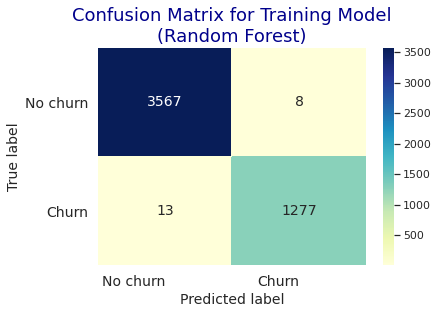

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Testing Model Performance: Show Metrics**

After creating the model, I will do the calculations to get the classification report and the confusion matrix. I will use `classification_report()` & `confusion_matrix()` functions.

In [ ]:
# Predict
y_test_pred = rdf_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1539
           1       0.59      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



**Testing Model Performance: Show Plot**

I will show a visualization of the metrics results that have been obtained in the previous step.

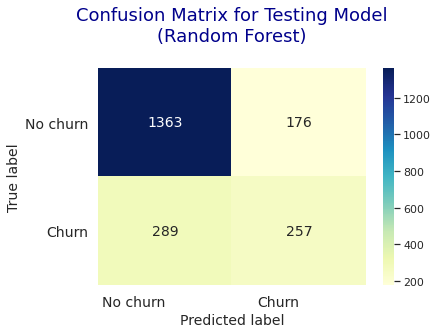

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Inference**

From the results and analysis above, I can conclude:
1. If I use the Random Forest algorithm by calling `RandomForestClassifier()` from sklearn without adding any parameters, then the resulting model with the default settings of sklearn, for details can be seen in the documentation.
2. From the training data, the model can predict the data by producing an accuracy of 100%, with details *3567 correctly predicted not churn*, *1277 correctly predicted churn*, *8 incorrectly predicted churn but actually not churn*, and *13 incorrectly predicted not churn but actually churn*
3. From the data testing, the model can predict the data by producing an accuracy of 77,7%, with details *1363 correctly predicted not churn*, *257 correctly predicted churn*, *176 incorrectly predicted churn but actually not churn*, and *289 incorrectly predited not churn but actually churn*

# Modelling: Gradient Boosting Classifier

Next, I will create a model using the Gradient Boosting Classifier Algorithm. I will use `GradientBoostingClassifier()` to call the algorithm, then fit it to a training data and save it as `gbt_model`.

In [ ]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Training Model Performance: Show Metrics**

After creating the model, I wil; do the calculations to get the classification report and the confusion matrix for training data. I will use `classification_report()` and `confusion_matrix()` functions.

In [ ]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



**Training Model Performance: Show Plot**

I will display a visualization of the metrics that have been generated previously.

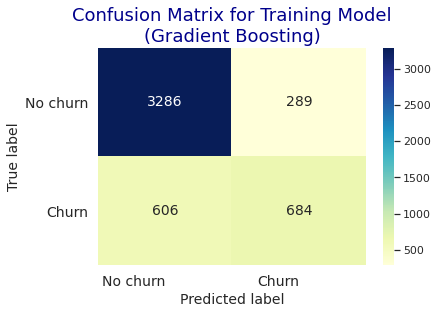

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Testing Model Performance: Show Metrics**

After creating the model, I will do the calculations to get the classification report and the confusion matrix for data testing. I use `classification_report()` and `confusion_matrix()` functions.

In [ ]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



**Testing Model Performance: Show Plot**

I will create a visualization of the previously generated metrics.

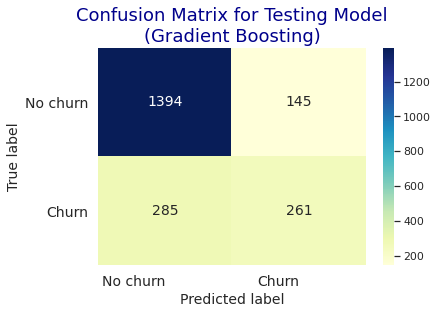

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Inference**

From the results and analysis above, I can conclude:
1. If I use the Gradient Boosting algorithm by calling `GradientBoostingClassifier()` from the sklearn package without adding any parameters, the resulting model with the default settings of sklearn, for details can be seen in the documentation.
2. From the training data, the model can predict the data by producing an accuracy of 82%, with details *3286 correctly predicted not churn*, *684 correctly predicted churn*, *289 incorrectly predicted churn but actually not churn*, and *606 incorrectly predicted not churn but actually churn*.
3. From the data testing, the model can predict the data by producing an accuracy of 79%, with details *1394 correctly predicted not churn*, *261 correctly predicted churn*, *145 incorrectly predicted churn but acually not churn*, and *285 incorrectly predicted not churn but actually churn*.

# Decide the Best Algorithm for Model

A good model is a model that is able to provide good performance in the training and testing phases of the model.
* **Overfitting** is a condition where the model is able to predict very well in the training phase, but cannot predict as well in the testing phase.
* **Underfitting** is a condition where the model is not able to predict well in the training phase, but is able to predict well in the testing phase.
* **Appropriate fitting** is a condition where the model is able to predict well in the training phase and in the testing phase.

For more details, can be seen from the illustration below:

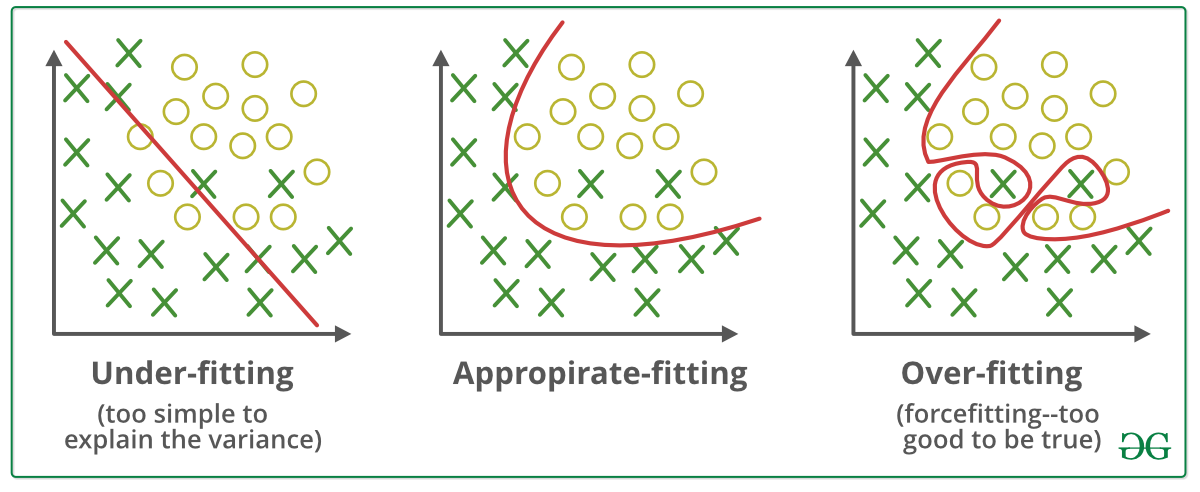

Next and last step, I will determine the best algorithm model from the model that has been done above (appropriate fitting), then I save it as a `best_model_churn.pkl` file with the aim that for later model deployment, there is no need to repeat the modeling, just call the file. Save in the file directory according to the dataset, then check whether the file is properly saved or not. Use `dump()` from pickle to save the file. I use the code below to save the model file to try on my personal laptop.

In [ ]:
# Print Logistic Regression
print(log_model)

#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Inference**

Based on the modeling that I have done using Logistic Regression, Random Forest and Extreme Gradiant Boost, it can be concluded that to predict churn from Telco customers using this dataset, the best model is to use the Logistic Regression algorithm. This is because the performance of the Logistic Regression model tends to be able to predict equally well in the training and testing phases (80% training accuracy, 79% testing accuracy), on the other hand other algorithms tend to overfit their performance. However, this does not lead me to conclude that if to do any modeling, Logistic Regression is used, I still have to do a lot of model experiments to determine which one is the best.